<a href="https://colab.research.google.com/github/tnthdrhks1/knu_machine_learning/blob/main/1121mcr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from glob import glob
from ast import literal_eval
from sklearn import linear_model

-2019 행복데이터 읽기


In [ ]:
df = pd.read_csv('2019.csv')
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
Y = df['Score']
X = df['GDP per capita']

In [ ]:
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)

In [ ]:
type(X), X.shape

(numpy.ndarray, (156, 1))

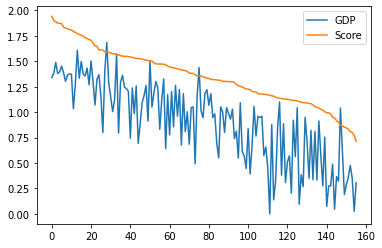

In [ ]:
plt.plot(X, label = 'GDP')
plt.plot(Y/4, label = 'Score') #스케일을 조정해서 보기좋게 함
plt.legend() #(지도, 도표 등의) 범례

In [ ]:
a = 3
b = 3.0

hx = np.linspace(0, 1.75, 100) #1 부터 1.75까지 1000등분
hy = a * hx + b # 직선방정식
hy #머신러닝 과정

array([3.        , 3.0530303 , 3.10606061, 3.15909091, 3.21212121,
       3.26515152, 3.31818182, 3.37121212, 3.42424242, 3.47727273,
       3.53030303, 3.58333333, 3.63636364, 3.68939394, 3.74242424,
       3.79545455, 3.84848485, 3.90151515, 3.95454545, 4.00757576,
       4.06060606, 4.11363636, 4.16666667, 4.21969697, 4.27272727,
       4.32575758, 4.37878788, 4.43181818, 4.48484848, 4.53787879,
       4.59090909, 4.64393939, 4.6969697 , 4.75      , 4.8030303 ,
       4.85606061, 4.90909091, 4.96212121, 5.01515152, 5.06818182,
       5.12121212, 5.17424242, 5.22727273, 5.28030303, 5.33333333,
       5.38636364, 5.43939394, 5.49242424, 5.54545455, 5.59848485,
       5.65151515, 5.70454545, 5.75757576, 5.81060606, 5.86363636,
       5.91666667, 5.96969697, 6.02272727, 6.07575758, 6.12878788,
       6.18181818, 6.23484848, 6.28787879, 6.34090909, 6.39393939,
       6.4469697 , 6.5       , 6.5530303 , 6.60606061, 6.65909091,
       6.71212121, 6.76515152, 6.81818182, 6.87121212, 6.92424

-방정식과 실제데이터의 오차 측정


In [ ]:
ab = np.abs((a * X + b) - Y)
np.mean(ab)

0.6594871794871795

Text(0.5, 1.0, 'GDP and Happy 156')

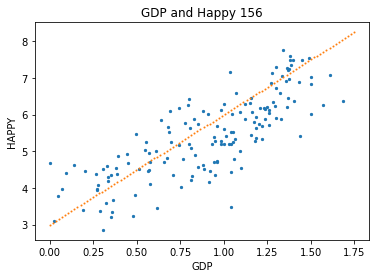

In [ ]:
plt.scatter(X, Y, s = 5) #점으로 그래프 그림, 2차원 (X,Y) 가 있어야함
plt.scatter(hx, hy, s = 1)

plt.xlabel("GDP")
plt.ylabel("HAPPY")
plt.title('GDP and Happy ' + str(len(X)))

-딥러닝으로 자동으로 구하기

In [ ]:
model = linear_model.LinearRegression()

model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.predict([[100]])

array([[225.21414528]])

In [ ]:
model.coef_, model.intercept_ #계수, 절편 Y = 2.21, X = 3.3

BestY = model.coef_ * hx +  model.intercept_
np.mean(np.abs((model.coef_ * X + model.intercept_) - Y))

0.5490499282630024

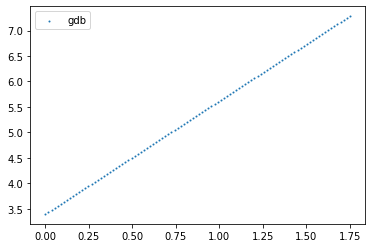

In [ ]:
plt.scatter(hx, BestY, s = 1, label = 'gdb')
plt.legend()

In [ ]:
#X 로 Y 예측하기 , 신발사이즈로 키 예측하기

X = [260, 230, 270, 260, 240 , 280, 275, 270, 270, 245, 270, 265, 270, 260]
Y = [167, 158, 175, 175, 163, 180, 175, 170, 185, 168, 179, 168, 175, 175]

len(X), len(Y)

(14, 14)

In [ ]:
Xn = np.array(X).reshape(-1, 1)
Yn = np.array(Y).reshape(-1, 1)

ModelSHoes = linear_model.LinearRegression()
ModelSHoes.fit(Xn, Yn)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
type(X), np.mean(X), np.mean(Y), np.min(X), np.min(Y), np.max(X), np.max(Y)

(numpy.ndarray, 261.7857142857143, 172.35714285714286, 230, 158, 280, 185)

In [ ]:
np.corrcoef(X, Y)

array([[1.        , 0.81471705],
       [0.81471705, 1.        ]])

In [ ]:
hx = np.arange(230, 280)
hy = ModelSHoes.coef_ * hx + ModelSHoes.intercept_ #최상위 모델

In [ ]:
cost = np.abs((ModelSHoes.coef_ * X + ModelSHoes.intercept_) - Y)

CostMean = np.mean(cost)

cost, CostMean

(array([[4.62661236, 1.35369993, 0.71758316, 3.37338764, 0.44467074,
         0.19144603, 2.76306857, 5.71758316, 9.28241684, 2.50984386,
         3.28241684, 5.67209776, 0.71758316, 3.37338764]]), 3.1446998351275357)

Text(0.5, 1.0, 'cost = 3.1446998351275357')

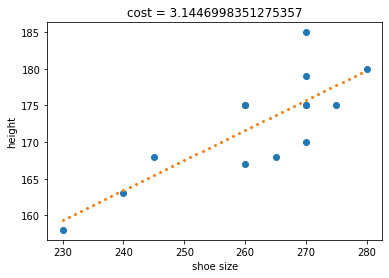

In [ ]:
plt.scatter(X, Y)
plt.scatter(hx, hy, s = 4)
plt.xlabel('shoe size')
plt.ylabel('height')

plt.title('cost = ' + str(CostMean))

In [ ]:
sample = [[220], [290], [310]]
print(ModelSHoes.predict(sample))
print(ModelSHoes.coef_ * sample + ModelSHoes.intercept_)

[[155.26272912]
 [183.89952478]
 [192.0814664 ]]
[[155.26272912]
 [183.89952478]
 [192.0814664 ]]


- 입력데이터를 gdp, Social support로 하여 행복점수 (score) 예측

#행복지수 = a * gpb + b * Ss + c 계수 2개, 절편 1개

In [ ]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
Y = df[['Score']].values
X = df[['GDP per capita', 'Social support']].values

X.shape, Y.shape

((156, 2), (156, 1))

In [ ]:
model = linear_model.LinearRegression()
model.fit(X,Y)

model.coef_, model.intercept_ #계수 2개 절편 1개

(array([[1.34647807, 1.53751048]]), array([2.32977064]))

In [ ]:
X[0][0]

df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
Y.shape
Y[:,0].shape

(156,)

In [ ]:
df.head(2)

h = np.sum(model.coef_ * X, axis = 1) + model.intercept_
np.mean(np.abs(Y[:, 0] - h))

0.48963214998748994

#타겟 = gdp, 입력 데이터 = 건강, 사회복지, 자유
#Y = a * x1 + b * x2 + c * x3 + D

In [ ]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:
Y = df['GDP per capita'].values
X = df[['Healthy life expectancy', 'Social support', 'Freedom to make life choices']].values

x1 = df['Healthy life expectancy']
Y.shape, X.shape, x1.shape, X.ndim, Y.ndim

((156,), (156, 3), (156,), 2, 1)

In [ ]:
model = linear_model.LinearRegression()
model.fit(X, Y)
model.coef_, model.intercept_

(array([ 9.97069886e-01,  4.25245353e-01, -9.76747399e-04]),
 -0.3316302446449141)

In [ ]:
np.mean(X), np.mean(Y)

(0.7755427350427351, 0.905147435897436)

In [ ]:
#오차

h_gdp = np.sum(model.coef_ * X, axis=1) + model.intercept_
cost = np.abs(Y - h_gdp)
np.mean(cost)

0.15306140209133387

- 오차가 큰 나라는 어디인가
- 조건부 선택

In [ ]:
cond = cost > 0.3
df[cond]

In [ ]:
df = pd.read_csv('winequality-red.csv', sep = ';')
df.loc[0]['quality']

5.0

In [ ]:
a = df.columns
df[df.columns[0]]

df.columns = [0,1,2,3,4,5,6,7,8,9,10,11]
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df[10].values

array([ 9.4,  9.8,  9.8, ..., 11. , 10.2, 11. ])

In [ ]:
datalist = []

for i in range(11):

  datalist.append(df[i].values)

In [ ]:
datalist = []

for i in range(11):

  datalist.append(df[i].values)

In [ ]:
Y = df[11].values
X = np.array(datalist)
X = np.transpose(X)

X.shape, Y.shape

((1599, 11), (1599,))

In [ ]:
model = linear_model.LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_, model.intercept_

(array([ 2.49905527e-02, -1.08359026e+00, -1.82563948e-01,  1.63312698e-02,
        -1.87422516e+00,  4.36133331e-03, -3.26457970e-03, -1.78811638e+01,
        -4.13653144e-01,  9.16334413e-01,  2.76197699e-01]),
 21.965208449451815)

In [ ]:
df.columns = a
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
hx = model.coef_ * X

In [ ]:
df.columns[np.argmax(np.abs(model.coef_))], df.columns[np.argmin(np.abs(model.coef_))]

('density', 'total sulfur dioxide')

In [ ]:
h = np.sum(model.coef_ * X , 1) + model.intercept_
np.mean(np.abs(h - Y))


0.5004899635644878

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
df[13] # 0은 정상 1 ~ 4는 심장병 있음
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
Y # y를 0과 1로 변환

Y = (Y>0).astype(np.float)

In [ ]:
df.isna()ㅁ

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,False,False,False,False,False,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
cond = (df == '?').sum(axis = 1) == 0
df = df[cond]
df.shape

(297, 14)

In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
Y # y를 0과 1로 변환

Y = (Y>0).astype(np.float)

In [ ]:
model = linear_model.LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
bfsum = (model.predict(X) > 0.5).astype(np.float)
bfsum

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1.

In [ ]:
print("틀린 개수 " ,np.sum(np.abs(Y - bfsum)))
print("오류비율", np.sum(np.abs(Y - bfsum)) / len(Y))
print("정확도 ", 1 - np.sum(np.abs(Y - bfsum)) / len(Y))

틀린 개수  44.0
오류비율 0.14814814814814814
정확도  0.8518518518518519
